# I) Summary

- The paper [Rethinking the Inception Architecture for Computer Vision](https://arxiv.org/pdf/1512.00567v3.pdf) proposed a number of upgrades which increase the accuracy and reduce the computational complexity of a deep convolutional network. The authors studied it in the context of the Inception architecture.
 
- They also studied how factorizing convolutions and aggressive dimension reductions inside neural network can result in networks with relatively low computational cost while maintaining high quality.

- They benchmarked their results on the ILSVRC 2012 classification challenge validation with a single model that has:    
    - less than 25 million parameters
    - 5 billion multiply-adds operations (for a single inference).
    - top-1 and top-5 error rate of 21.2% and 5.6%.

## General design principles

- They proposed few general design principles and optimization ideas that proved to be useful for scaling up convolution networks in efficient ways. The author issues to use these ideas judiciously!
    - **Avoid representational bottlenecks, especially early in the network**. Down scale the input image and the feature maps gently.
    - **The more different filters you have, the more different feature maps** (higher dimensional representations) **you will have and the faster your network will learn** because it will have access to more different informations leading to detect which features are salient earlier in the training. 
    - **Spatial aggregation (dimension reduction) can be done over lower dimensional embeddings without much or any loss in representational power.** It means that in the inception module, performing a 1x1 convolution before a 3x3 convolution will not cause serious adverse effects. This will even promotes faster learning.
    - **Optimal performance of the network can be reach by a careful balance between the width and depth**.

## Factorizing convolutions

- They have studied how factorizing convolutions and aggressive dimension reductions inside neural network can result in networks with relatively low computational cost while maintaining high quality.


- They factorize 5x5 convolution into two stacked 3x3 convolution which result in a $(9+9)/25$ computation load reduction with a relative gain of $28\%$ by this factorization.
    
    <div style="text-align:center">
        <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/1.png">
    </div>
    
    - To get these numbers, let's say we have a 5x5 input image and after a convolution, we want to produce a 5x5 output image (use of padding). The goal is to compare the number of operations between a 5x5 convolution and 2 stacked 3x3 convolutions.

        - With a 5x5 convolution, we need a padding of 2.
            - \# of operations = 5x5x5x5 = 25x25.

        - With 2 stacked 3x3 convolution, we need a padding of 1 for each convolution.
            - \# of operations = 5x5x3x3 + 5x5x3x3 = 25x9 + 25x9 = 25x18.
        
    - Thus, 2 stacked 3x3 convolutions reduce the computation load by  $(9+9)/25$ ((25x18)/(25x25) = 18/25 = (9+9)/25) which result in a computation saving of $28\%$ by this factorization ((1 - 18/25)*100 = 28\%).

    - Moreover, it is worth noticing that 2 stacked 3x3 filters give the same receptive field as as a 5x5 filter.


- They factorize n x n convolution into a combination of 1 x n convolution and n x 1 convolution. They call it "asymmetric convolution". 

- For example, a 3x3 convolution is equivalent to first performing a 1x3 convolution, and then performing a 3x1 convolution on its output. They found it to be $33\%$ cheaper than a single 3x3 convolution.

    - Same experience as above but this time with a 3x3 input/output image:
        - with a 3x3 convolution, we need a padding of 1:
            - \# of operations = 3x3x3x3 = 81. 
        - with combination of 1x3 / 3x1 convolutions, we need a padding of 1 for each convolution:
            - \# of operations = 3x3x1x3 + 3x3x3x1 = 54.
        - Thus, a combination of 1x3 and 3x1 convolutions result in a computation saving of  $33\%$ ((1 - (54/81))*100 = 33\%) by this factorization.
        <br>
        <div style="text-align:center">
        <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/2.png" width="60%">
        </div>
        
        
## Grid size reduction

- Traditionally, convolutional networks use some pooling before convolution operations to reduce the gride size of the feature maps. Problem is, it can introduce a representational bottleneck.


- The authors think that increasing the number of filters (expand the filter bank) remove the representational bottleneck. This is achieved by the inception module. 

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/3.png">
</div>
<br>

- In the left picture, we are introducing a representational bottleneck by first reducing the grid size and then expanding the filter bank which is the other way around in the right picture. 
- To get the intuition behind it, let's follow this simple example. Suppose you are a primary student split between choosing either general study or technical study.
    -  It makes more sense to choose general study to learn first different stuffs and then specialize in what you like (expand first, reduce after). By specializing first (reduce first), you will close yourself some doors (loss of information) so if you don't like what you chose and try to look for other fields after (expand after), then it will be harder to find something different.

- However, the right side is more expensive so they proposed another solution that reduces the computational cost while eliminating the bottleneck (by using 2 parallel stride 2 pooling/convolution blocks).

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/4.png">
    <figcaption> The diagram on the right represents the same <br> solution but from the perspective of grid sizes<br> rather than the operations.</figcaption>
</div>
<br>

## Inception-V2

Whole network is 42 layers deep, computational cost is 2.5 times higher than GoogLeNet.

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/5.png">
</div>
<br>
<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/6.png">
</div>
<br>

<ins>**Remark:**</ins> Authors say they use variations of reduction technique (picture below) to reduce the grid sizes between the Inception blocks whenever applicable. They also add an auxilary classifier on top of the last 17×17 layer.

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/7.png">
</div>

## Utility of Auxiliary Classifiers

- Authors say that they didn't contribute much but act more as regularizer if used with batch normalization or dropout.

## Label smoothing

- In CNN, the label is a vector. If you have 3 class, the one-hot labels are [0, 0, 1] or [0, 1, 0] or [1, 0, 0]. Each of the vector stands for a class at the output layer. Label smoothing, in my understanding, is to use a relatvely smooth vector to represent a ground truth label. Say [0, 0, 1] can be represented as [0.1, 0.1, 0.8]. It is used when the loss function is the cross entropy function.
 
- According to the author:
    - First, it (using unsmoothed label) may result in overfitting: if the model learns to assign full probability to the ground-truth label for each training example, it is not guaranteed to generalize. 
    - Second, it encourages the differences between the largest logit and all others to become large, and this, combined with the bounded gradient, reduces the ability of the model to adapt. Intuitively, this happens because the model becomes too confident about its predictions.

- They claim that by using label smoothing, the top-1 and top-5 error rate are reduced by 0.2%.

## Inception V3

Inception Net v3 incorporated all of the above upgrades stated for Inception v2, and in addition used the following:

- RMSProp Optimizer.
- Factorized 7x7 convolutions.
- BatchNorm in the Auxillary Classifiers.
- Label Smoothing.

## Architecture

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/8.png">
</div>

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/9.png">
</div>

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/10.png">
</div>

<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/inception-v2-v3/11.png">
</div>

# II) Implementation

We will implement Inception-V2. According to the paper,

```
The detailed structure of the network, including the sizes of filter banks inside 
the Inception modules, is given in the supplementary material, given in the model.txt
```

However, no ```model.txt``` was found so we have to refer to the tensorflow implementation.

In [0]:
import numpy as np
import os
import cv2
import shutil
import urllib.request
import scipy.stats as stats
from collections import OrderedDict
from matplotlib import pyplot as plt
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
from torchsummary import summary

## a)  Loading dataset / Preprocessing

In [0]:
def load_cifar():
    
    transform = transforms.Compose([transforms.Resize((96,96)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5], std=[0.5])])
            
    train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
    test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

    #Clear downloading message.
    clear_output()
    
    # Split dataset into training set and validation set.
    train_dataset, val_dataset = random_split(train_dataset, (45000, 5000))
    
    print("Image Shape: {}".format(train_dataset[0][0].numpy().shape), end = '\n\n')
    print("Training Set:   {} samples".format(len(train_dataset)))
    print("Validation Set:   {} samples".format(len(val_dataset)))
    print("Test Set:       {} samples".format(len(test_dataset)))
    
    if torch.cuda.is_available():
        BATCH_SIZE = 1024
    else:
        BATCH_SIZE = 32

    # Create iterator.
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=True)
    
    # Delete the data/ folder.
    shutil.rmtree('./data')
    
    return train_loader, val_loader, test_loader

In [3]:
train_loader, val_loader, test_loader = load_cifar()

Image Shape: (3, 96, 96)

Training Set:   45000 samples
Validation Set:   5000 samples
Test Set:       10000 samples


In [0]:
def plot_example_errors(X, y, y_pred):
    """
        Plots 9 example errors and their associate true/predicted labels.
        
        Parameters:
        -X: Training examples.
        -y: true labels.
        -y_pred: predicted labels.
    
    """
    incorrect = (y != y_pred)
    X = X[incorrect]
    y = y[incorrect]
    y_pred = y_pred[incorrect]

    # Plot the first 9 images.
    plot_example(X, y, y_pred)

In [0]:
def plot_example(X, y, y_pred=None):
    """
        Plots 9 examples and their associate labels.
        
        Parameters:
        -X: Training examples.
        -y: true labels.
        -y_pred: predicted labels.
    """
    classes = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
               5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
    
    # Create figure with 3 x 3 sub-plots.
    fig, axes = plt.subplots(3, 3, figsize=(10,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
     
    X, y = X[:9, 0, ...], y[:9]
    
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(X[i])

        # Show true and predicted classes.
        if y_pred is None:
            xlabel = "True: {0}".format(classes[y[i]])
        else:
            xlabel = "True: {0}, Pred: {1}".format(classes[y[i]], classes[y_pred[i]])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots in a single Notebook cell.
    plt.show()

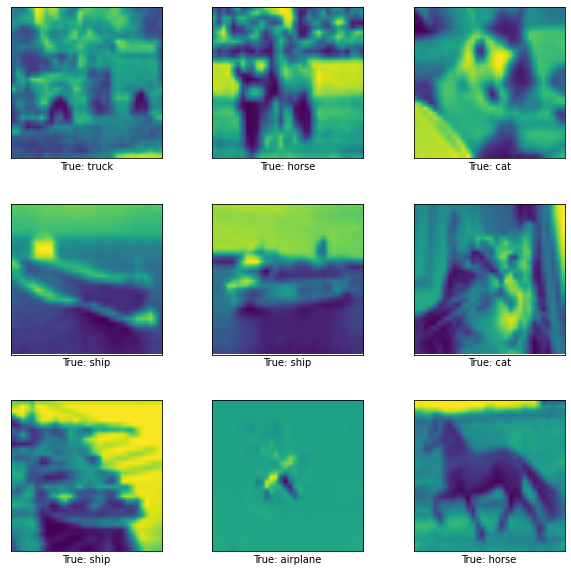

In [6]:
images, labels = iter(train_loader).next()
plot_example(images.numpy(), labels.numpy())

## b)  Architecture build

In [0]:
class ConvBlock(nn.Module):
    
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super(ConvBlock, self).__init__()
        
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.act = nn.ReLU()
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.act(x)
        return x

In [0]:
class InceptionF5(nn.Module):
    """
        From the paper, figure 5 inception module.
    """
    def __init__(self, in_channels):
        super(InceptionF5, self).__init__()
        
        self.branch1 = nn.Sequential(
            ConvBlock(in_channels, 64, kernel_size=1, stride=1, padding=0),
            ConvBlock(64, 96, kernel_size=3, stride=1, padding=1),
            ConvBlock(96, 96, kernel_size=3, stride=1, padding=1)
        )
        
        self.branch2 = nn.Sequential(
            ConvBlock(in_channels, 48, kernel_size=1, stride=1, padding=0),
            ConvBlock(48, 64, kernel_size=3, stride=1, padding=1)
        )
        
        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            ConvBlock(in_channels, 64, kernel_size=1, stride=1, padding=0)
        )
        
        self.branch4 = nn.Sequential(
            ConvBlock(in_channels, 64, kernel_size=1, stride=1, padding=0)
        )
        
    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)
        
        return torch.cat([branch1, branch2, branch3, branch4], 1)

In [0]:
class InceptionF6(nn.Module):
    """
        From the paper, figure 6 inception module.
    """
    def __init__(self, in_channels, f_7x7):
        super(InceptionF6, self).__init__()
        
        self.branch1 = nn.Sequential(
            ConvBlock(in_channels, f_7x7, kernel_size=1, stride=1, padding=0),
            ConvBlock(f_7x7, f_7x7, kernel_size=(1,7), stride=1, padding=(0,3)),
            ConvBlock(f_7x7, f_7x7, kernel_size=(7,1), stride=1, padding=(3,0)),
            ConvBlock(f_7x7, f_7x7, kernel_size=(1,7), stride=1, padding=(0,3)),
            ConvBlock(f_7x7, 192, kernel_size=(7,1), stride=1, padding=(3,0))
        )
        
        self.branch2 = nn.Sequential(
            ConvBlock(in_channels, f_7x7, kernel_size=1, stride=1, padding=0),
            ConvBlock(f_7x7, f_7x7, kernel_size=(1,7), stride=1, padding=(0,3)),
            ConvBlock(f_7x7, 192, kernel_size=(7,1), stride=1, padding=(3,0))
        )
        
        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            ConvBlock(in_channels, 192, kernel_size=1, stride=1, padding=0)
        )
        
        self.branch4 = nn.Sequential(
            ConvBlock(in_channels, 192, kernel_size=1, stride=1, padding=0)
        )
        
    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)
        
        return torch.cat([branch1, branch2, branch3, branch4], 1)

In [0]:
class InceptionF7(nn.Module):
    """
        From the paper, figure 7 inception module.
    """
    def __init__(self, in_channels):
        super(InceptionF7, self).__init__()
        
        self.branch1 = nn.Sequential(
            ConvBlock(in_channels, 448, kernel_size=1, stride=1, padding=0),
            ConvBlock(448, 384, kernel_size=(3,3), stride=1, padding=1)
        )
        self.branch1_top = ConvBlock(384, 384, kernel_size=(1,3), stride=1, padding=(0,1))
        self.branch1_bot = ConvBlock(384, 384, kernel_size=(3,1), stride=1, padding=(1,0))
        
        
        self.branch2 = ConvBlock(in_channels, 384, kernel_size=1, stride=1, padding=0)
        self.branch2_top = ConvBlock(384, 384, kernel_size=(1,3), stride=1, padding=(0,1))
        self.branch2_bot = ConvBlock(384, 384, kernel_size=(3,1), stride=1, padding=(1,0))
        
        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            ConvBlock(in_channels, 192, kernel_size=1, stride=1, padding=0)
        )
        
        self.branch4 = nn.Sequential(
            ConvBlock(in_channels, 320, kernel_size=1, stride=1, padding=0)
        )
        
    def forward(self, x):
        branch1 = self.branch1(x)
        branch1 = torch.cat([self.branch1_top(branch1), self.branch1_bot(branch1)], 1)
        
        branch2 = self.branch2(x)
        branch2 = torch.cat([self.branch2_top(branch2), self.branch2_bot(branch2)], 1)
        
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)
        
        return torch.cat([branch1, branch2, branch3, branch4], 1)

In [0]:
class InceptionRed(nn.Module):
    """
        From the paper, figure 10 improved pooling operation.
    """
    def __init__(self, in_channels, f_3x3_r, add_ch=0):
        super(InceptionRed, self).__init__()
        
        self.branch1 = nn.Sequential(
            ConvBlock(in_channels, f_3x3_r, kernel_size=1, stride=1, padding=0),
            ConvBlock(f_3x3_r, 178 + add_ch, kernel_size=3, stride=1, padding=1),
            ConvBlock(178 + add_ch, 178 + add_ch, kernel_size=3, stride=2, padding=0)
        )
        
        self.branch2 = nn.Sequential(
            ConvBlock(in_channels, f_3x3_r, kernel_size=1, stride=1, padding=0),
            ConvBlock(f_3x3_r, 302 + add_ch, kernel_size=3, stride=2, padding=0)
        )
        
        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride=2, padding=0)
        )
        
    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        
        return torch.cat([branch1, branch2, branch3], 1)

In [0]:
class InceptionAux(nn.Module):
    """
        From the paper, auxilary classifier
    """
    def __init__(self, in_channels, num_classes):
        super(InceptionAux, self).__init__()
        
        self.pool = nn.AdaptiveAvgPool2d((4,4))
        self.conv = nn.Conv2d(in_channels, 128, kernel_size=1, stride=1, padding=0)
        self.act = nn.ReLU()
        self.fc1 = nn.Linear(2048, 1024)
        self.dropout = nn.Dropout(0.7)
        self.fc2 = nn.Linear(1024, num_classes)
    
    def forward(self, x):
        x = self.pool(x)
        
        x = self.conv(x)
        x = self.act(x)
    
        x = torch.flatten(x, 1)
        
        x = self.fc1(x)
        x = self.act(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        
        return x

In [0]:
class InceptionV2(nn.Module):
    
    def __init__(self, num_classes = 10):
        super(InceptionV2, self).__init__()
        
        self.conv1 = ConvBlock(3, 32, kernel_size=3, stride=2, padding=0)
        self.conv2 = ConvBlock(32, 32, kernel_size=3, stride=1, padding=0)
        self.conv3 = ConvBlock(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(3, stride=2, padding=0)
        self.conv4 = ConvBlock(64, 80, kernel_size=3, stride=1, padding=0)
        self.conv5 = ConvBlock(80, 192, kernel_size=3, stride=2, padding=0)
        self.conv6 = ConvBlock(192, 288, kernel_size=3, stride=1, padding=1)
        
        self.inception3a = InceptionF5(288)
        self.inception3b = InceptionF5(288)
        self.inception3c = InceptionF5(288)
        
        self.inceptionRed1 = InceptionRed(288,f_3x3_r=64, add_ch=0)
        
        self.inception4a = InceptionF6(768, f_7x7=128)
        self.inception4b = InceptionF6(768, f_7x7=160)
        self.inception4c = InceptionF6(768, f_7x7=160)
        self.inception4d = InceptionF6(768, f_7x7=160)
        self.inception4e = InceptionF6(768, f_7x7=192)
        
        self.inceptionRed2 = InceptionRed(768,f_3x3_r=192, add_ch=16)
        
        self.aux = InceptionAux(768, num_classes) 
        
        self.inception5a = InceptionF7(1280)
        self.inception5b = InceptionF7(2048)
        
        self.pool6 = nn.AdaptiveAvgPool2d((1,1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(2048, num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.pool1(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        
        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.inception3c(x)

        x = self.inceptionRed1(x)
        
        x = self.inception4a(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        x = self.inception4e(x)
        
        aux = self.aux(x)
        
        x = self.inceptionRed2(x)    
        x = self.inception5a(x)
        x = self.inception5b(x)
        
        x = self.pool6(x)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x, aux

In [0]:
model = InceptionV2()

In [15]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
summary(model, (3, 96, 96))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 47, 47]             896
       BatchNorm2d-2           [-1, 32, 47, 47]              64
              ReLU-3           [-1, 32, 47, 47]               0
         ConvBlock-4           [-1, 32, 47, 47]               0
            Conv2d-5           [-1, 32, 45, 45]           9,248
       BatchNorm2d-6           [-1, 32, 45, 45]              64
              ReLU-7           [-1, 32, 45, 45]               0
         ConvBlock-8           [-1, 32, 45, 45]               0
            Conv2d-9           [-1, 64, 45, 45]          18,496
      BatchNorm2d-10           [-1, 64, 45, 45]             128
             ReLU-11           [-1, 64, 45, 45]               0
        ConvBlock-12           [-1, 64, 45, 45]               0
        MaxPool2d-13           [-1, 64, 22, 22]               0
           Conv2d-14           [-1, 80,

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## c) Training the model

In [0]:
def train_model():
    EPOCHS = 15
    nb_examples = 45000
    nb_val_examples = 5000
    train_costs, val_costs = [], []
    
    #Training phase.
    
    for epoch in range(EPOCHS):

        train_loss = 0
        correct_train = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            # Zero the parameter gradients.
            optimizer.zero_grad()
            
            # Forward pass.
            prediction0, prediction1 = model(inputs)
            
            # Compute the loss.
            loss0 = criterion(prediction0, labels)
            loss1 = criterion(prediction1, labels)
            
            loss = loss0 + 0.3 * loss1
            # Backward pass.
            loss.backward()
            
            # Optimize.
            optimizer.step()
            
            # Compute training accuracy.
            _, predicted = torch.max(prediction0.data, 1)
            correct_train += (predicted == labels).float().sum().item()
            
            # Compute batch loss.
            train_loss += (loss.data.item() * inputs.shape[0])


        train_loss /= nb_examples
        train_costs.append(train_loss)
        train_acc =  correct_train / nb_examples

        val_loss = 0
        correct_val = 0
  
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction0, prediction1 = model(inputs)

                # Compute the loss.
                loss0 = criterion(prediction0, labels)
                loss1 = criterion(prediction1, labels)

                loss = loss0 + 0.3 * loss1

                # Compute training accuracy.
                _, predicted = torch.max(prediction0.data, 1)
                correct_val += (predicted == labels).float().sum().item()

            # Compute batch loss.
            val_loss += (loss.data.item() * inputs.shape[0])

            val_loss /= nb_val_examples
            val_costs.append(val_loss)
            val_acc =  correct_val / nb_val_examples
        
        info = "[Epoch {}/{}]: train-loss = {:0.6f} | train-acc = {:0.3f} | val-loss = {:0.6f} | val-acc = {:0.3f}"
        print(info.format(epoch+1, EPOCHS, train_loss, train_acc, val_loss, val_acc))
        torch.save(model.state_dict(), 'save_weights/checkpoint_gpu_{}'.format(epoch + 1)) 
                                                                
    torch.save(model.state_dict(), 'save_weights/inception-v2_weights_gpu')  
        
    return train_costs, val_costs

In [0]:
train_costs, val_costs = train_model()

[Epoch 1/15]: train-loss = 2.559885 | train-acc = 0.259 | val-loss = 2.215568 | val-acc = 0.359
[Epoch 2/15]: train-loss = 1.992639 | train-acc = 0.424 | val-loss = 1.846719 | val-acc = 0.472
[Epoch 3/15]: train-loss = 1.640984 | train-acc = 0.537 | val-loss = 1.591195 | val-acc = 0.558
[Epoch 4/15]: train-loss = 1.385598 | train-acc = 0.619 | val-loss = 1.439533 | val-acc = 0.614
[Epoch 5/15]: train-loss = 1.168221 | train-acc = 0.684 | val-loss = 1.305238 | val-acc = 0.655
[Epoch 6/15]: train-loss = 1.002453 | train-acc = 0.731 | val-loss = 1.214881 | val-acc = 0.681
[Epoch 7/15]: train-loss = 0.851118 | train-acc = 0.771 | val-loss = 1.217857 | val-acc = 0.687
[Epoch 8/15]: train-loss = 0.711145 | train-acc = 0.811 | val-loss = 1.147356 | val-acc = 0.711
[Epoch 9/15]: train-loss = 0.608349 | train-acc = 0.838 | val-loss = 1.140132 | val-acc = 0.724
[Epoch 10/15]: train-loss = 0.515004 | train-acc = 0.863 | val-loss = 1.154486 | val-acc = 0.735
[Epoch 11/15]: train-loss = 0.437409 | 

In [16]:
#Restore the model.
model = InceptionV2()
model.load_state_dict(torch.load('save_weights/inception-v2_weights_gpu'))

<All keys matched successfully>

In [17]:
nb_test_examples = 10000
correct = 0 

model.eval().cuda()

with  torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        # Make predictions.
        prediction, _ = model(inputs)

        # Retrieve predictions indexes.
        _, predicted_class = torch.max(prediction.data, 1)

        # Compute number of correct predictions.
        correct += (predicted_class == labels).float().sum().item()

test_accuracy = correct / nb_test_examples
print('Test accuracy: {}'.format(test_accuracy))

Test accuracy: 0.7418
